In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cert-insider-threat-detection-research/users.csv
/kaggle/input/cert-insider-threat-detection-research/logon.csv
/kaggle/input/cert-insider-threat-detection-research/device.csv
/kaggle/input/cert-insider-threat-detection-research/psychometric.csv
/kaggle/input/cert-insider-threat-detection-research/http.csv
/kaggle/input/cert-insider-threat-detection-research/email.csv
/kaggle/input/cert-insider-threat-detection-research/file.csv
/kaggle/input/cert-insider-threat-detection-research/decoy_file.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-08.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2011-03.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-10.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-02.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-03.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-09.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2011-04

In [36]:
import os

dataset_path = "/kaggle/input/cert-insider-threat-detection-research"
print(os.listdir(dataset_path))


['LDAP', 'users.csv', 'logon.csv', 'device.csv', 'psychometric.csv', 'http.csv', 'email.csv', 'file.csv', 'decoy_file.csv']


In [37]:
logon = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/logon.csv", nrows=100000)
file = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/file.csv", nrows=100000)
email = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/email.csv", nrows=100000)
decoy = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/decoy_file.csv", nrows=100000)
http = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/http.csv" , nrows = 100000)
device = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/device.csv" , nrows = 100000)

In [38]:
http.head()

,id,date,user,pc,url,activity,content
0,{V1D3-W8BL16YA-2594OWGB},01/02/2010 06:21:31,ANC1950,PC-4921,http://icio.us/John_Edward_Brownlee_as_Attorne...,WWW Visit,Further consultation with post-production team...
1,{C7A0-F6CK17IX-5508HGRY},01/02/2010 06:21:42,ANC1950,PC-4921,http://babycenter.com/Manchester_SmallScale_Ex...,WWW Visit,These two populations have been observed in ma...
2,{C0X3-I5RZ16GM-1535IAMY},01/02/2010 06:21:58,ANC1950,PC-4921,http://babycenter.com/Manchester_SmallScale_Ex...,WWW Visit,These two populations have been observed in ma...
3,{G8V6-M0CF17SO-9968THHW},01/02/2010 06:28:04,ANC1950,PC-4921,http://timeanddate.com/Accurate_News_and_Infor...,WWW Visit,Cape sold the US rights to the recently formed...
4,{I9A3-Z4JU92SK-7362XXPN},01/02/2010 06:29:26,SAB1954,PC-5091,http://timeanddate.com/Accurate_News_and_Infor...,WWW Visit,Cape sold the US rights to the recently formed...


In [39]:
http.isnull().sum()

id          0
date        0
user        0
pc          0
url         0
activity    0
content     0
dtype: int64

In [40]:
http['date'] = pd.to_datetime(http['date'])

http_features = http.groupby(["user", "date"]).agg(
    num_http_requests=("id", "count"),
    unique_urls=("url", "nunique"),
    unique_pcs_http=("pc", "nunique"),
    avg_content_length_http=("content", lambda x: x.str.len().mean())
)


# http_features = http.groupby('user').agg(
#     num_http_requests=('id', 'count'),
#     unique_urls=('url', 'nunique'),
#     unique_pcs_http=('pc', 'nunique'),
#     avg_content_length_http=('content', lambda x: x.str.len().mean())
# )


In [41]:
http_features.head()

num_http_requests  unique_urls  unique_pcs_http  \
user    date                                                                   
AAB0162 2010-01-04 07:46:30                  1            1                1   
        2010-01-04 07:46:36                  1            1                1   
        2010-01-04 07:46:51                  1            1                1   
        2010-01-04 08:03:10                  1            1                1   
        2010-01-04 08:03:46                  1            1                1   

                             avg_content_length_http  
user    date                                          
AAB0162 2010-01-04 07:46:30                    699.0  
        2010-01-04 07:46:36                    816.0  
        2010-01-04 07:46:51                    699.0  
        2010-01-04 08:03:10                    393.0  
        2010-01-04 08:03:46                    393.0

In [42]:
device.head()

,id,date,user,pc,file_tree,activity
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect


In [43]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         100000 non-null  object
 1   date       100000 non-null  object
 2   user       100000 non-null  object
 3   pc         100000 non-null  object
 4   file_tree  50202 non-null   object
 5   activity   100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [44]:
device.isnull().sum()

id               0
date             0
user             0
pc               0
file_tree    49798
activity         0
dtype: int64

In [45]:
device['file_tree'] = device['file_tree'].fillna("NoTree")


In [46]:
device.isnull().sum()

id           0
date         0
user         0
pc           0
file_tree    0
activity     0
dtype: int64

In [47]:
device_features = device.groupby(["user", "date"]).agg(
    num_device_events=("id", "count"),
    num_connects=('activity', lambda x: (x == 'Connect').sum()),
    num_disconnects=('activity', lambda x: (x == 'Disconnect').sum()),
    unique_pcs_device=('pc', 'nunique'),
    avg_filetree_length=('file_tree', lambda x: x.dropna().apply(lambda s: len(str(s))).mean())
)

# device_features = device.groupby('user').agg(
#     num_device_events=('id', 'count'),
#     num_connects=('activity', lambda x: (x == 'Connect').sum()),
#     num_disconnects=('activity', lambda x: (x == 'Disconnect').sum()),
#     unique_pcs_device=('pc', 'nunique'),
#     avg_filetree_length=('file_tree', lambda x: x.dropna().apply(lambda s: len(str(s))).mean())
# )


In [48]:
logon.head()

,id,date,user,pc,activity
0,{F3X8-Y2GT43DR-4906OHBL},01/02/2010 02:19:18,DNS1758,PC-0414,Logon
1,{B4Q0-D0GM24KN-3704MAII},01/02/2010 02:31:12,DNS1758,PC-0414,Logoff
2,{T7J1-D4HK34KV-5476TCIJ},01/02/2010 02:34:02,DNS1758,PC-5313,Logon
3,{S4Y6-D8MQ05SA-0759HLIS},01/02/2010 02:53:30,DNS1758,PC-5313,Logoff
4,{F3P0-E7FH78CV-4874FRGZ},01/02/2010 04:07:31,DNS1758,PC-0012,Logon


In [49]:
# Convert to datetime
logon["date"] = pd.to_datetime(logon["date"])

# Group by both user and date
logon_features = logon.groupby(["user", "date"]).agg(
    num_logins=("id", "count"),
    avg_login_hour=("date", lambda x: x.dt.hour.mean()),
    unique_pcs=("pc", "nunique")
)

# Fill missing values
logon_features = logon_features.fillna(0)

print(logon_features.head())
print(logon_features.index.names)  # should be ['user', 'date']



                             num_logins  avg_login_hour  unique_pcs
user    date                                                       
AAB0162 2010-01-04 07:41:00           1             7.0           1
        2010-01-04 18:46:00           1            18.0           1
        2010-01-05 07:46:00           1             7.0           1
        2010-01-05 18:40:00           1            18.0           1
        2010-01-06 07:45:00           1             7.0           1
['user', 'date']


In [50]:
file.head()

,id,date,user,pc,filename,activity,to_removable_media,from_removable_media,content
0,{F3E2-X3MV05YQ-3516SZDT},01/02/2010 07:19:41,SDH2394,PC-5849,R:\60WBQE7S.doc,File Open,False,True,"D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L..."
1,{I6N1-Z7VL92UY-8715ESKQ},01/02/2010 07:21:30,SDH2394,PC-5849,R:\0VGILDW8.pdf,File Write,True,False,25-50-44-46-2D ---- Bengali As do many other T...
2,{G4X5-J7MH70FV-8936QVSB},01/02/2010 07:22:11,SDH2394,PC-5849,R:\60WBQE7S.doc,File Copy,False,True,"D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L..."
3,{M2M7-Z5ST21EU-6704NSKO},01/02/2010 07:24:06,SDH2394,PC-5849,R:\22B5gX4\H8Y96RRE.doc,File Write,True,False,D0-CF-11-E0-A1-B1-1A-E1 After the death of his...
4,{R0A9-O9XB25PE-9236MALV},01/02/2010 07:24:45,SDH2394,PC-5849,R:\SDH2394\7XRCV2N5.pdf,File Copy,True,False,25-50-44-46-2D Although he restored some of th...


In [51]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    100000 non-null  object
 1   date                  100000 non-null  object
 2   user                  100000 non-null  object
 3   pc                    100000 non-null  object
 4   filename              100000 non-null  object
 5   activity              100000 non-null  object
 6   to_removable_media    100000 non-null  bool  
 7   from_removable_media  100000 non-null  bool  
 8   content               100000 non-null  object
dtypes: bool(2), object(7)
memory usage: 5.5+ MB


In [52]:
file['date'] = pd.to_datetime(file['date'])
file_features = file.groupby(["user", "date"]).agg(
    num_files_accessed=("filename", "count"),
    num_files_to_removable=("to_removable_media", "sum"),
    num_files_from_removable=("from_removable_media", "sum"),
    unique_files=("filename", "nunique"),
    avg_content_length=('content', lambda x: x.str.len().mean())
)

# file_features = file.groupby('user').agg(
#     num_files_accessed=('filename', 'count'),               # total files accessed
#     num_files_to_removable=('to_removable_media', 'sum'),   # writes to removable media
#     num_files_from_removable=('from_removable_media', 'sum'), # reads from removable media
#     unique_files=('filename', 'nunique'),                   # unique files accessed
#     avg_content_length=('content', lambda x: x.str.len().mean())  # average content length
# )

print(file_features.head())


                             num_files_accessed  num_files_to_removable  \
user    date                                                              
AAB0162 2010-01-13 10:34:04                   1                       0   
        2010-01-13 12:22:42                   1                       0   
        2010-01-18 15:40:26                   1                       0   
AAB0398 2010-01-14 10:19:14                   1                       0   
        2010-01-25 09:02:22                   1                       0   

                             num_files_from_removable  unique_files  \
user    date                                                          
AAB0162 2010-01-13 10:34:04                         0             1   
        2010-01-13 12:22:42                         0             1   
        2010-01-18 15:40:26                         0             1   
AAB0398 2010-01-14 10:19:14                         0             1   
        2010-01-25 09:02:22                     

In [53]:
email.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010 06:36:41,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,Send,45659,NaN,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010 06:40:02,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,View,34142,NaN,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010 06:42:48,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,Send,1310925,C:\28X79b6\0PAGXTJ8.doc(1119253);C:\11b38g6\5M...,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010 06:45:42,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,View,23043,NaN,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010 06:47:07,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,View,25210,NaN,Much like all the other large groups of prison...


In [54]:
decoy.head()

,decoy_filename,pc
0,C:\LJE2413\795JW126.jpg,PC-0302
1,C:\QMU9BC38.pdf,PC-6566
2,C:\GIS1668\YPS1RSIK.jpg,PC-2606
3,C:\KD02AETE.pdf,PC-5393
4,C:\AUZTDD4J.jpg,PC-8753


In [55]:
logon.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [56]:
file.isnull().sum()

id                      0
date                    0
user                    0
pc                      0
filename                0
activity                0
to_removable_media      0
from_removable_media    0
content                 0
dtype: int64

In [57]:
email.isnull().sum()

id                 0
date               0
user               0
pc                 0
to                 0
cc             56584
bcc            94175
from               0
activity           0
size               0
attachments    81529
content            0
dtype: int64

In [58]:
# Fill NaNs with meaningful defaults
email['to'] = email['to'].fillna('')
email['cc'] = email['cc'].fillna('')
email['bcc'] = email['bcc'].fillna('')
email['attachments'] = email['attachments'].fillna('')
email['content'] = email['content'].fillna('')


In [59]:
email.head()
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           100000 non-null  object
 1   date         100000 non-null  object
 2   user         100000 non-null  object
 3   pc           100000 non-null  object
 4   to           100000 non-null  object
 5   cc           100000 non-null  object
 6   bcc          100000 non-null  object
 7   from         100000 non-null  object
 8   activity     100000 non-null  object
 9   size         100000 non-null  int64 
 10  attachments  100000 non-null  object
 11  content      100000 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB


In [60]:
# Number of recipients per email
email['num_recipients'] = email['to'].apply(lambda x: len(str(x).split(';'))) + \
                          email['cc'].apply(lambda x: len(str(x).split(';'))) + \
                          email['bcc'].apply(lambda x: len(str(x).split(';')))

# Has attachment? 0 = no, 1 = yes
email['has_attachment'] = email['attachments'].apply(lambda x: 0 if x == '' else 1)

# Content length (number of characters)
email['content_length'] = email['content'].apply(lambda x: len(str(x)))

# Email size (already numeric, fill NaN with 0)
email['size'] = email['size'].fillna(0)


# Ensure email['date'] is datetime
email["date"] = pd.to_datetime(email["date"])

# Group by user & date
email_features = email.groupby(["user", "date"]).agg(
    num_emails=("id", "count"),
    unique_recipients=("to", "nunique"),
    avg_email_hour=("date", lambda x: x.dt.hour.mean())
)

email_features = email_features.fillna(0)
print(email_features.head())
print(email_features.index.names)  # should be ['user', 'date']



                             num_emails  unique_recipients  avg_email_hour
user    date                                                              
AAB0162 2010-01-04 08:34:26           1                  1             8.0
        2010-01-04 08:40:32           1                  1             8.0
        2010-01-04 08:41:06           1                  1             8.0
        2010-01-04 08:42:09           1                  1             8.0
        2010-01-04 08:42:48           1                  1             8.0
['user', 'date']


In [61]:
decoy.head()

,decoy_filename,pc
0,C:\LJE2413\795JW126.jpg,PC-0302
1,C:\QMU9BC38.pdf,PC-6566
2,C:\GIS1668\YPS1RSIK.jpg,PC-2606
3,C:\KD02AETE.pdf,PC-5393
4,C:\AUZTDD4J.jpg,PC-8753


In [62]:
decoy.isnull().sum()

decoy_filename    0
pc                0
dtype: int64

In [63]:
# Create a column marking decoy files in the main file dataset
file['is_decoy'] = file['filename'].isin(decoy['decoy_filename']).astype(int)

# Now aggregate per user
decoy_features = file.groupby(["user" , "date"]).agg(
    num_decoy_files_accessed=('is_decoy', 'sum'),     # total decoy files touched
    pct_decoy_files_accessed=('is_decoy', 'mean')     # fraction of accessed files that are decoys
)

decoy_features = decoy_features.fillna(0)
print(decoy_features.head())


                             num_decoy_files_accessed  \
user    date                                            
AAB0162 2010-01-13 10:34:04                         1   
        2010-01-13 12:22:42                         1   
        2010-01-18 15:40:26                         1   
AAB0398 2010-01-14 10:19:14                         1   
        2010-01-25 09:02:22                         1   

                             pct_decoy_files_accessed  
user    date                                           
AAB0162 2010-01-13 10:34:04                       1.0  
        2010-01-13 12:22:42                       1.0  
        2010-01-18 15:40:26                       1.0  
AAB0398 2010-01-14 10:19:14                       1.0  
        2010-01-25 09:02:22                       1.0  


In [64]:
decoy_features.head()

num_decoy_files_accessed  \
user    date                                            
AAB0162 2010-01-13 10:34:04                         1   
        2010-01-13 12:22:42                         1   
        2010-01-18 15:40:26                         1   
AAB0398 2010-01-14 10:19:14                         1   
        2010-01-25 09:02:22                         1   

                             pct_decoy_files_accessed  
user    date                                           
AAB0162 2010-01-13 10:34:04                       1.0  
        2010-01-13 12:22:42                       1.0  
        2010-01-18 15:40:26                       1.0  
AAB0398 2010-01-14 10:19:14                       1.0  
        2010-01-25 09:02:22                       1.0

In [65]:
print("Logon index:", logon_features.index)
print("File index:", file_features.index)
print("Email index:", email_features.index)
print("HTTP index:", http_features.index)
print("Device index:", device_features.index)
print("Decoy index:", decoy_features.index)


Logon index: MultiIndex([('AAB0162', '2010-01-04 07:41:00'),
            ('AAB0162', '2010-01-04 18:46:00'),
            ('AAB0162', '2010-01-05 07:46:00'),
            ('AAB0162', '2010-01-05 18:40:00'),
            ('AAB0162', '2010-01-06 07:45:00'),
            ('AAB0162', '2010-01-06 18:55:00'),
            ('AAB0162', '2010-01-07 07:45:00'),
            ('AAB0162', '2010-01-07 18:43:00'),
            ('AAB0162', '2010-01-08 07:50:00'),
            ('AAB0162', '2010-01-08 18:41:00'),
            ...
            ('ZZO2997', '2010-01-11 07:34:00'),
            ('ZZO2997', '2010-01-11 14:51:00'),
            ('ZZO2997', '2010-01-12 07:39:00'),
            ('ZZO2997', '2010-01-12 14:55:00'),
            ('ZZO2997', '2010-01-13 07:49:00'),
            ('ZZO2997', '2010-01-13 14:43:00'),
            ('ZZO2997', '2010-01-14 07:42:00'),
            ('ZZO2997', '2010-01-14 14:56:00'),
            ('ZZO2997', '2010-01-15 07:46:00'),
            ('ZZO2997', '2010-01-15 14:43:00')],
          

In [66]:
features = (
    logon_features
    .join(file_features.add_suffix("_file"), how="outer")
    .join(email_features.add_suffix("_email"), how="outer")
    .join(http_features.add_suffix("_http"), how="outer")
    .join(device_features.add_suffix("_device"), how="outer")
    .join(decoy_features.add_suffix("_decoy"), how="outer")
)

# Replace missing values
features = features.fillna(0)

print(features.head())



/tmp/ipykernel_36/654326420.py:6: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  .join(device_features.add_suffix("_device"), how="outer")
/tmp/ipykernel_36/654326420.py:7: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  .join(decoy_features.add_suffix("_decoy"), how="outer")


                             num_logins  avg_login_hour  unique_pcs  \
user    date                                                          
AAB0162 2010-01-04 07:41:00         1.0             7.0         1.0   
        2010-01-04 07:46:30         0.0             0.0         0.0   
        2010-01-04 07:46:36         0.0             0.0         0.0   
        2010-01-04 07:46:51         0.0             0.0         0.0   
        2010-01-04 08:03:10         0.0             0.0         0.0   

                             num_files_accessed_file  \
user    date                                           
AAB0162 2010-01-04 07:41:00                      0.0   
        2010-01-04 07:46:30                      0.0   
        2010-01-04 07:46:36                      0.0   
        2010-01-04 07:46:51                      0.0   
        2010-01-04 08:03:10                      0.0   

                             num_files_to_removable_file  \
user    date                                     

In [69]:
from sklearn.ensemble import IsolationForest

# Create model
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit model on features (all numeric columns)
X = features.values
clf.fit(X)

# Predict anomalies
features['anomaly'] = clf.predict(X)
# -1 = anomaly, 1 = normal

print(features[['anomaly']].head())


                             anomaly
user    date                        
AAB0162 2010-01-04 07:41:00        1
        2010-01-04 07:46:30        1
        2010-01-04 07:46:36        1
        2010-01-04 07:46:51        1
        2010-01-04 08:03:10        1


In [70]:
from sklearn.preprocessing import StandardScaler

X = features.drop(columns=['anomaly']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
# Count normal vs anomalies
features['anomaly'].value_counts()


anomaly
 1    467250
-1     24176
Name: count, dtype: int64

                             anomaly  anomaly_score
user    date                                       
AAB0162 2010-01-04 07:41:00        1       0.124094
        2010-01-04 07:46:30        1       0.111569
        2010-01-04 07:46:36        1       0.073135
        2010-01-04 07:46:51        1       0.111569
        2010-01-04 08:03:10        1       0.087865


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


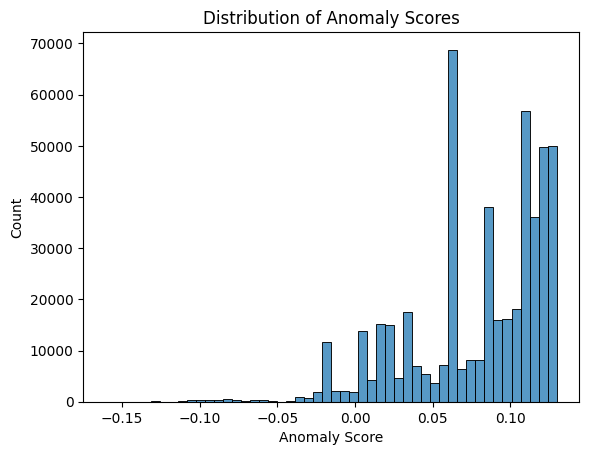

In [72]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Prepare feature matrix (drop previous anomaly columns if any)
# X = features.drop(columns=['anomaly'], errors='ignore').values
# Drop identifier columns (user, date) and anomaly-related columns
drop_cols = ["user", "date", "anomaly", "anomaly_score"]
numeric_cols = [c for c in features.columns if c not in drop_cols]

# 1️⃣ Prepare feature matrix
X = features[numeric_cols].values

# 2️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Fit Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
clf.fit(X_scaled)

# 4️⃣ Predict anomalies (-1 = anomaly, 1 = normal)
features['anomaly'] = clf.predict(X_scaled)

# 5️⃣ Compute continuous anomaly score
features['anomaly_score'] = clf.decision_function(X_scaled)

# 6️⃣ Check the top rows
print(features[['anomaly', 'anomaly_score']].head())

# 7️⃣ Plot anomaly score distribution
sns.histplot(features['anomaly_score'], bins=50)
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.show()



In [ ]:
features['anomaly'].value_counts()


In [ ]:
top_suspicious = features[features['anomaly'] == -1].sort_values('anomaly_score')
top_suspicious.head()


In [ ]:
features.to_csv("results.csv", index=True)   # keep index (user) in CSV


In [ ]:
print(decoy.columns)


In [73]:
# ---------------------------
# Imports
# ---------------------------
import numpy as np
import pandas as pd
import collections
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Masking
import tensorflow as tf
from sklearn.metrics import classification_report

# ---------------------------
# Helper functions
# ---------------------------
def safe_group_agg(df, by_cols, agg_map):
    """Group by by_cols only if columns exist; returns empty df with by_cols if nothing aggregated."""
    if df is None:
        return pd.DataFrame(columns=by_cols)
    if not all(col in df.columns for col in by_cols):
        return pd.DataFrame(columns=by_cols)
    use_map = {k:v for k,v in agg_map.items() if k in df.columns}
    if not use_map:
        return pd.DataFrame(columns=by_cols)
    out = df.groupby(by_cols).agg(use_map).reset_index()
    return out

def safe_rename(df, rename_map):
    rename_map = {k:v for k,v in rename_map.items() if k in df.columns}
    return df.rename(columns=rename_map)

def make_feature_table(tbl, name, agg_map, rename_map):
    """Create feature df for table tbl if user+date present, else empty with those cols."""
    if tbl is None or not all(c in tbl.columns for c in ["user","date"]):
        print(f"Skipping {name} — missing 'user' or 'date'")
        return pd.DataFrame(columns=["user","date"] + list(agg_map.keys()))
    feat = safe_group_agg(tbl, ["user","date"], agg_map)
    feat = safe_rename(feat, rename_map)
    return feat

# ---------------------------
# Build feature tables
# ---------------------------
logon = globals().get("logon", None)
device = globals().get("device", None)
file = globals().get("file", None)
email = globals().get("email", None)
http = globals().get("http", None)
decoy = globals().get("decoy", None)

# LOGON
logon_feat = make_feature_table(
    logon, "logon",
    {"pc":"nunique","activity":"count"},
    {"pc":"unique_pcs","activity":"num_logins"}
)

# DEVICE
device_agg_map = {"pc":"nunique", "activity":"count"}
if device is not None and "file_tree" in device.columns:
    device_agg_map["file_tree"] = lambda x: x.astype(str).str.len().mean()
device_feat = make_feature_table(
    device, "device",
    device_agg_map,
    {"pc":"unique_pcs_device","activity":"num_device_events","file_tree":"avg_filetree_length_device"}
)

# FILE
file_agg_map = {
    "filename":"nunique",
    "to_removable_media":"sum",
    "from_removable_media":"sum",
    "activity":"count",
    "content": lambda x: x.astype(str).str.len().mean()
}
file_feat = make_feature_table(
    file, "file",
    file_agg_map,
    {
        "filename":"unique_files_file",
        "to_removable_media":"num_files_to_removable_file",
        "from_removable_media":"num_files_from_removable_file",
        "activity":"num_file_events",
        "content":"avg_content_length_file"
    }
)

# EMAIL
email_agg_map = {
    "to":"count",
    "num_recipients":"mean",
    "size":"mean",
    "has_attachment":"mean"
}
if email is not None:
    if "content_length" in email.columns:
        email_agg_map["content_length"] = lambda x: x.astype(float).mean()
    elif "content" in email.columns:
        email_agg_map["content"] = lambda x: x.astype(str).str.len().mean()

email_feat = make_feature_table(
    email, "email",
    email_agg_map,
    {
        "to":"num_emails_sent_email",
        "num_recipients":"avg_num_recipients_email",
        "size":"avg_size_email",
        "has_attachment":"pct_emails_with_attachment_email",
        "content_length":"avg_content_length_email",
        "content":"avg_content_length_email"
    }
)

# HTTP
http_agg_map = {
    "url":"nunique",
    "activity":"count",
    "content": lambda x: x.astype(str).str.len().mean(),
    "bytes":"mean"
}
http_feat = make_feature_table(
    http, "http",
    http_agg_map,
    {
        "url":"unique_urls_http",
        "bytes":"avg_bytes_http",
        "activity":"num_http_events",
        "content":"avg_content_length_http"
    }
)

# DECOY
if decoy is None or not all(c in decoy.columns for c in ["user","date"]):
    print("Decoy table missing user/date — skipping decoy features.")
    decoy_feat = pd.DataFrame(columns=["user","date"])
else:
    decoy_agg_map = {
        "decoy_filename":"nunique",
        "filetree":"count",
        "activity":"count",
        "content": lambda x: x.astype(str).str.len().mean()
    }
    decoy_feat = make_feature_table(
        decoy, "decoy",
        decoy_agg_map,
        {
            "decoy_filename":"unique_decoy_files",
            "filetree":"num_decoy_filetrees",
            "activity":"num_decoy_events",
            "content":"avg_content_length_decoy"
        }
    )

# ---------------------------
# Merge all feature tables
# ---------------------------
feature_dfs = [logon_feat, device_feat, file_feat, email_feat, http_feat, decoy_feat]
feature_dfs = [f for f in feature_dfs if not f.empty]

if len(feature_dfs) == 0:
    raise ValueError("No valid feature tables found (need at least one with user+date).")

for i in range(len(feature_dfs)):
    if "date" in feature_dfs[i].columns:
        feature_dfs[i]["date"] = pd.to_datetime(feature_dfs[i]["date"], errors="coerce")
    else:
        raise ValueError(f"'date' column missing in feature_df {i}")

features = reduce(
    lambda l, r: pd.merge(l, r, on=["user","date"], how="outer"),
    feature_dfs
)

features = features.fillna(0).sort_values(["user","date"]).reset_index(drop=True)
print("✅ Merged features shape:", features.shape)

# ---------------------------
# Prepare sequences
# ---------------------------
drop_cols = ["user","date"]
numeric_cols = [c for c in features.columns if c not in drop_cols]

for c in numeric_cols:
    features[c] = pd.to_numeric(features[c], errors="coerce").fillna(0.0)

X_groups = []
users_list = []
seq_min_length = 5
for user, g in features.groupby("user"):
    g = g.sort_values("date")
    arr = g[numeric_cols].values.astype("float32")
    if arr.shape[0] >= seq_min_length:
        X_groups.append(arr)
        users_list.append(user)

print("Num users with >= {} days: {}".format(seq_min_length, len(X_groups)))

# Sliding windows
SEQ_LEN = 14   # 🔧 shorter than 30 so you don’t drop everyone
stride = 1
seqs, owner_user = [], []
for u_idx, arr in enumerate(X_groups):
    if arr.shape[0] < SEQ_LEN:
        continue
    for start in range(0, arr.shape[0]-SEQ_LEN+1, stride):
        seqs.append(arr[start:start+SEQ_LEN])
        owner_user.append(users_list[u_idx])

if len(seqs) == 0:
    print("No full-length windows — using padded sequences.")
    X = pad_sequences(X_groups, dtype="float32", padding="post")
    nsamples, ntimesteps, nfeatures = X.shape
else:
    X = np.stack(seqs)
    nsamples, ntimesteps, nfeatures = X.shape
    print("Sliding windows created:", X.shape)

# ---------------------------
# Scale
# ---------------------------
X_2d = X.reshape(-1, nfeatures)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_2d).reshape(nsamples, ntimesteps, nfeatures)

# ---------------------------
# LSTM Autoencoder
# ---------------------------
tf.keras.backend.clear_session()

model = Sequential([
    Masking(mask_value=0.0, input_shape=(ntimesteps, nfeatures)),
    LSTM(128, activation='relu', return_sequences=False),
    RepeatVector(ntimesteps),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(nfeatures))
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# ---------------------------
# Train
# ---------------------------
history = model.fit(
    X_scaled, X_scaled,
    epochs=10,
    batch_size=64,
    validation_split=0.1 if nsamples > 10 else 0.0,
    shuffle=True
)

# ---------------------------
# Anomaly Detection
# ---------------------------
X_pred = model.predict(X_scaled)
mse_seq = np.mean(np.power(X_scaled - X_pred, 2), axis=(1,2))

# More adaptive threshold
threshold = np.percentile(mse_seq, 95)
anomaly_flags_seq = mse_seq > threshold
print("Sequences:", len(mse_seq), "Anomalous:", anomaly_flags_seq.sum(), "Threshold:", threshold)

# ---------------------------
# Map anomalies to users
# ---------------------------
if len(seqs) == 0:
    # padded case
    user_anom_counts = collections.Counter()
    user_total_counts = collections.Counter()
    for u_idx, arr in enumerate(X_groups):
        user_total_counts[users_list[u_idx]] += 1
    X_pred_pad = model.predict(X_scaled)
    mse_per_sample = np.mean(np.power(X_scaled - X_pred_pad, 2), axis=(1,2))
    for u_idx, m in enumerate(mse_per_sample):
        if m > threshold:
            user_anom_counts[users_list[u_idx]] += 1
else:
    user_anom_counts = collections.Counter()
    user_total_counts = collections.Counter()
    for u, is_anom in zip(owner_user, anomaly_flags_seq):
        user_total_counts[u] += 1
        if is_anom:
            user_anom_counts[u] += 1

user_anom_df = pd.DataFrame([
    {"user": u,
     "num_sequences": user_total_counts[u],
     "num_anom_sequences": user_anom_counts[u],
     "pct_anom_sequences": (user_anom_counts[u]/user_total_counts[u]) if user_total_counts[u]>0 else 0.0}
    for u in user_total_counts
]).sort_values("pct_anom_sequences", ascending=False)

print("Top users with anomalies:")
display(user_anom_df.head(30))


Decoy table missing user/date — skipping decoy features.
✅ Merged features shape: (491426, 20)
Num users with >= 5 days: 4000
Sliding windows created: (439426, 14, 18)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1758137589.679833      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758137589.680520      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 14, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 14, 18)         │         2,322 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,170 (817.07 KB)

 Trainable params: 209,170 (817.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1758137598.890186     109 service.cc:148] XLA service 0x544b9730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758137598.890759     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758137598.890778     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758137599.611328     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  33/6180 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.0242

I0000 00:00:1758137601.758869     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6180/6180 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 0.0095 - val_loss: 0.0030
Epoch 2/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 3/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.0012 - val_loss: 9.3216e-04
Epoch 5/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 8.8579e-04 - val_loss: 6.8151e-04
Epoch 6/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 6.8286e-04 - val_loss: 6.3181e-04
Epoch 7/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 5.1163e-04 - val_loss: 4.0241e-04
Epoch 8/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 4.0401e-04 - val_loss: 3.4889e-04
Epoch 9/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 3.2193e-04 - val_loss: 2.6477e-04
Epoch 10/10
6180/6180 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 2.7539e-04 - val_loss: 2.1187e-04
13733/13733 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
Sequences: 439426 Anom

,user,num_sequences,num_anom_sequences,pct_anom_sequences
776,CKG3838,19,14,0.736842
1715,IJM3356,98,52,0.530612
2159,KJB0354,67,35,0.522388
1516,HAL1200,18,9,0.500000
2864,NSW0122,52,25,0.480769
1551,HDL2297,28,13,0.464286
267,ARC2809,22,10,0.454545
3071,RAF1290,56,25,0.446429
921,CWL0561,32,14,0.437500
3258,RTW2758,32,14,0.437500


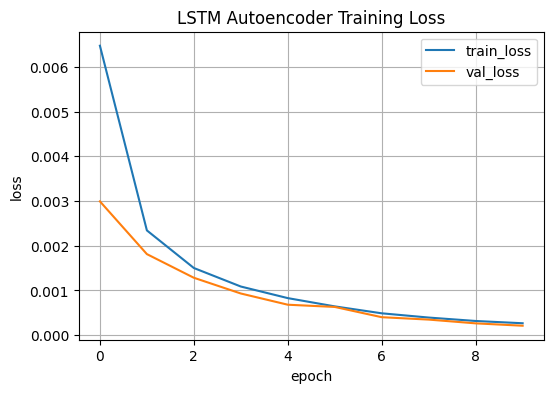

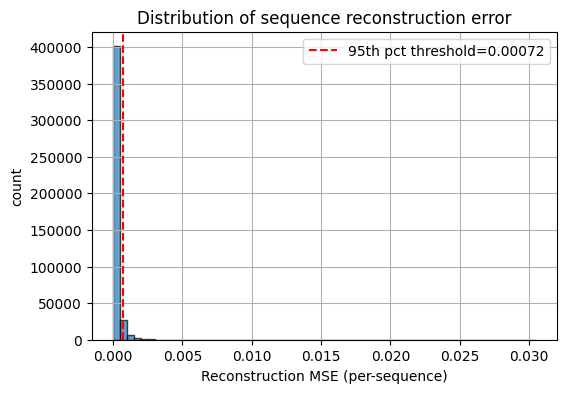

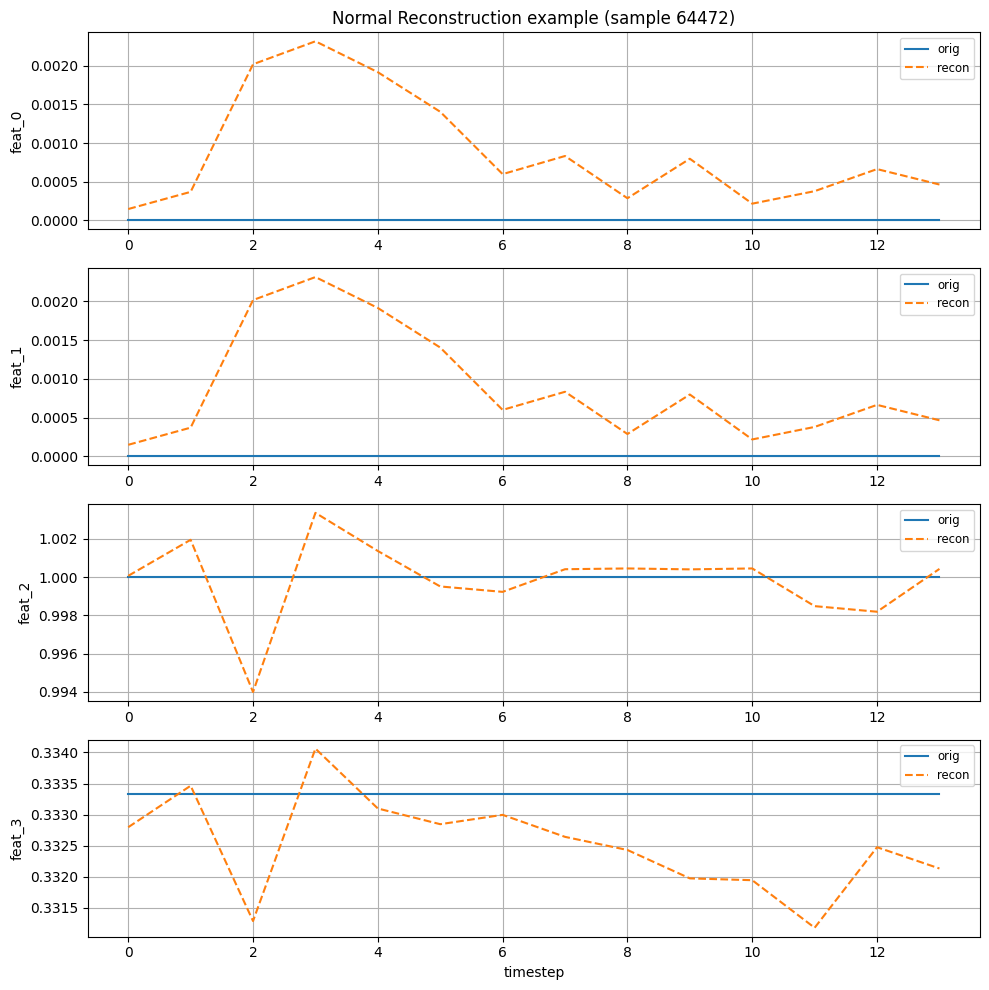

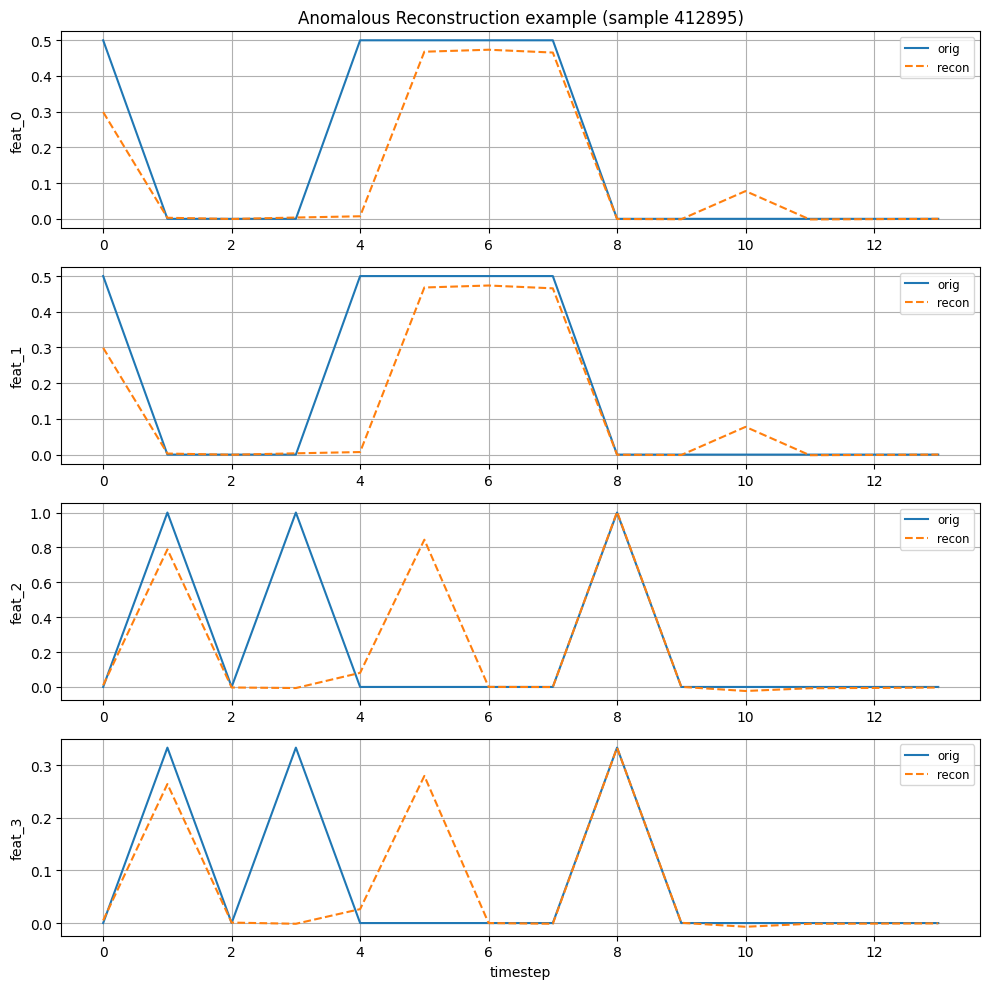

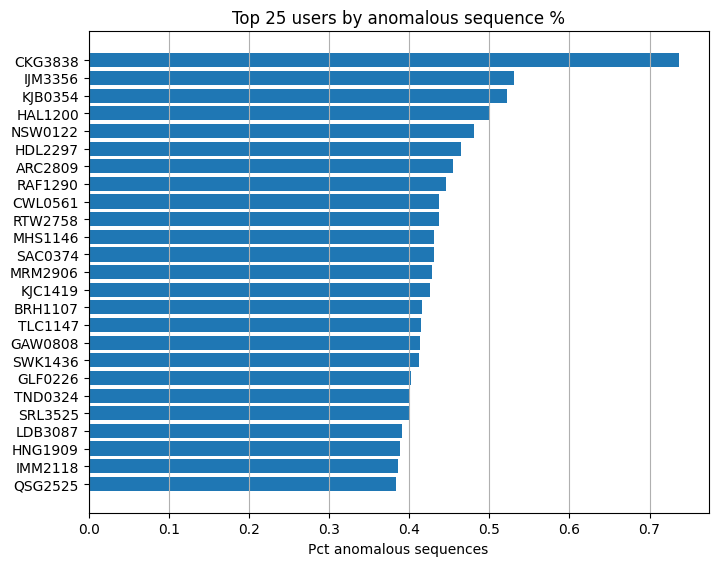


No ground-truth labels found. Top 10 candidate anomalous sequence indices (by MSE):
1. sample_idx=412895, mse=0.030482, user=VYP0637
2. sample_idx=412896, mse=0.029936, user=VYP0637
3. sample_idx=412894, mse=0.028835, user=VYP0637
4. sample_idx=412891, mse=0.024071, user=VYP0637
5. sample_idx=412893, mse=0.024039, user=VYP0637
6. sample_idx=412889, mse=0.023635, user=VYP0637
7. sample_idx=412890, mse=0.023357, user=VYP0637
8. sample_idx=412887, mse=0.022574, user=VYP0637
9. sample_idx=412892, mse=0.021143, user=VYP0637
10. sample_idx=412886, mse=0.020735, user=VYP0637


In [74]:
# ---------------------------
# Plots + Metrics (paste after your existing code)
# ---------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import numpy as np
import os

# --- 1) Training loss plot (history) ---
if 'history' in globals() and hasattr(history, 'history'):
    plt.figure(figsize=(6,4))
    plt.plot(history.history.get('loss', []), label='train_loss')
    if 'val_loss' in history.history:
        plt.plot(history.history.get('val_loss', []), label='val_loss')
    plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('LSTM Autoencoder Training Loss')
    plt.legend(); plt.grid(True)
    plt.show()
else:
    print("No 'history' object found or it has no .history. Skipping training-loss plot.")

# --- 2) Histogram of sequence MSEs + threshold line ---
plt.figure(figsize=(6,4))
plt.hist(mse_seq, bins=60, edgecolor='k', alpha=0.7)
plt.axvline(threshold, color='r', linestyle='--', label=f'95th pct threshold={threshold:.5f}')
plt.xlabel('Reconstruction MSE (per-sequence)'); plt.ylabel('count')
plt.title('Distribution of sequence reconstruction error')
plt.legend(); plt.grid(True)
plt.show()

# --- 3) Example reconstruction of a random anomalous & normal sequence ---
def plot_reconstruction(sample_idx, title_prefix=""):
    if len(X_scaled.shape) != 3:
        return
    orig = X_scaled[sample_idx]
    reco = X_pred[sample_idx]
    # plot first 4 features (or fewer)
    nplot = min(4, orig.shape[1])
    t = np.arange(orig.shape[0])
    plt.figure(figsize=(10, 2.5 * nplot))
    for i in range(nplot):
        plt.subplot(nplot,1,i+1)
        plt.plot(t, orig[:, i], label='orig')
        plt.plot(t, reco[:, i], label='recon', linestyle='--')
        plt.ylabel(f'feat_{i}')
        if i == 0: plt.title(f'{title_prefix} Reconstruction example (sample {sample_idx})')
        if i == nplot-1: plt.xlabel('timestep')
        plt.legend(loc='upper right', fontsize='small')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# choose one anomalous and one normal if available
anom_idx = None
norm_idx = None
if len(mse_seq) > 0:
    # try find highest mse (=anomalous) and lowest (=normal)
    sorted_idx = np.argsort(mse_seq)
    norm_idx = int(sorted_idx[0])
    anom_idx = int(sorted_idx[-1])

    plot_reconstruction(norm_idx, title_prefix="Normal")
    plot_reconstruction(anom_idx, title_prefix="Anomalous")
else:
    print("No sequences to visualize reconstructions.")

# --- 4) Top-N users bar chart (user_anom_df was created earlier) ---
if 'user_anom_df' in globals() and not user_anom_df.empty:
    topn = 25
    df_plot = user_anom_df.head(topn).copy()
    df_plot = df_plot.sort_values('pct_anom_sequences')
    plt.figure(figsize=(8, max(4, 0.25 * len(df_plot))))
    plt.barh(df_plot['user'].astype(str), df_plot['pct_anom_sequences'])
    plt.xlabel('Pct anomalous sequences'); plt.title(f'Top {len(df_plot)} users by anomalous sequence %')
    plt.grid(axis='x')
    plt.show()
else:
    print("user_anom_df not present or empty — skipping top-users bar chart.")

# --- 5) Sequence-level metrics if ground-truth labels exist ---
# The code expects an array/list 'y_true_seq' aligned with your sequences X (len == len(mse_seq)).
# If you have per-user/day labels, you must map them to each sequence window first.
if 'y_true_seq' in globals() and len(y_true_seq) == len(mse_seq):
    y_true = np.asarray(y_true_seq).astype(int)
    y_pred = (mse_seq > threshold).astype(int)

    print("\nClassification report (thresholded at {:.5f}):".format(threshold))
    print(classification_report(y_true, y_pred, digits=4))

    # ROC AUC
    try:
        roc_auc = roc_auc_score(y_true, mse_seq)
        print("ROC AUC (seq-level): {:.4f}".format(roc_auc))
    except Exception as e:
        print("ROC AUC could not be computed:", e)

    # Precision-Recall curve and AUPR
    try:
        prec, rec, _ = precision_recall_curve(y_true, mse_seq)
        aupr = auc(rec, prec)
        print("AUPR (seq-level): {:.4f}".format(aupr))
        plt.figure(figsize=(5,4))
        plt.plot(rec, prec, label=f'AUPR={aupr:.3f}')
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.grid(True); plt.legend()
        plt.show()
    except Exception as e:
        print("Precision-Recall plot failed:", e)

    # ROC curve plot
    try:
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_true, mse_seq)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc:.3f}')
        plt.plot([0,1],[0,1], linestyle='--', color='grey')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.grid(True); plt.legend()
        plt.show()
    except Exception as e:
        print("ROC plot failed:", e)
else:
    # If no labels available, show top-k highest-mse sequences as candidates (inspect manually)
    k = 10
    sorted_idx = np.argsort(-mse_seq)
    topk_idx = sorted_idx[:k]
    print(f"\nNo ground-truth labels found. Top {k} candidate anomalous sequence indices (by MSE):")
    for i, idx in enumerate(topk_idx):
        print(f"{i+1}. sample_idx={idx}, mse={mse_seq[idx]:.6f}, user={owner_user[idx] if 'owner_user' in globals() else 'N/A'}")

# --- 6) Per-user anomaly summary CSV export (optional) ---
out_csv = os.getenv('ANOMALY_OUT_CSV', None)
if out_csv:
    if 'user_anom_df' in globals() and not user_anom_df.empty:
        user_anom_df.to_csv(out_csv, index=False)
        print(f"Saved per-user anomaly summary to {out_csv}")
    else:
        print("user_anom_df missing; cannot save CSV.")
